# Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os
from keras.layers import Input, Lambda, Dense, Flatten, Dropout
from tensorflow.keras import layers, models, Model
from keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np

# Descriptive Analytics

## Data Pre-processing and Data Augmentation

In [2]:
IMAGE_SIZE = [299, 299]

In [3]:
trainingDataGenerator = ImageDataGenerator(rotation_range = 360,
                                     width_shift_range = 0.05,
                                     height_shift_range = 0.05,
                                     shear_range = 0.05,
                                     zoom_range = 0.05,
                                     horizontal_flip = True,
                                     vertical_flip = True,
                                     brightness_range = [0.75, 1.25],
                                     rescale = 1./255)

In [4]:
training_data = trainingDataGenerator.flow_from_directory(
        'C:/Users/91865/Desktop/archive/casting_data/casting_data/train',
        target_size=IMAGE_SIZE,
        batch_size=32,
        class_mode="binary",shuffle=True
)

Found 6633 images belonging to 2 classes.


In [5]:
classes = os.listdir('C:/Users/91865/Desktop/archive/casting_data/casting_data/train')
classes

['def_front', 'ok_front']

## Data Vizualization

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

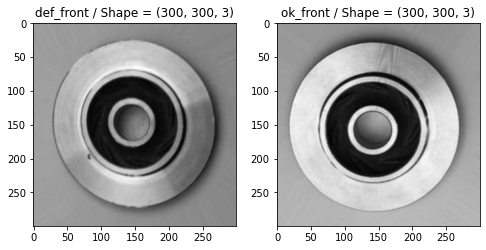

In [6]:
plt.figure(figsize=(8,8))

for i in enumerate(classes):
    pic = os.listdir('C:/Users/91865/Desktop/archive/casting_data/casting_data/train/'+i[1])[0]
    image = Image.open('C:/Users/91865/Desktop/archive/casting_data/casting_data/train/'+i[1]+'/'+pic)
    image = np.asarray(image)
    plt.subplot(1,2,i[0]+1)
    plt.title('{0} / Shape = {1}'.format(i[1], image.shape))
    plt.imshow(image)
plt.show()

In [7]:
validation_data = trainingDataGenerator.flow_from_directory(
        'C:/Users/91865/Desktop/archive/casting_data/casting_data/test',
        target_size=IMAGE_SIZE,
        batch_size=32,
        class_mode="binary", shuffle=True
)

Found 715 images belonging to 2 classes.


In [8]:
testDataGenerator = ImageDataGenerator(rescale = 1./255)
test_data = testDataGenerator.flow_from_directory(
        'C:/Users/91865/Desktop/archive/casting_512x512/casting_512x512',
        target_size=IMAGE_SIZE,
        batch_size=32,
        class_mode="binary", shuffle=False
)

Found 1300 images belonging to 2 classes.


In [9]:
train_def="C:/Users/91865/Desktop/archive/casting_data/casting_data/train/def_front"
train_ok="C:/Users/91865/Desktop/archive/casting_data/casting_data/train/ok_front"
test_def="C:/Users/91865/Desktop/archive/casting_data/casting_data/test/def_front"
test_ok="C:/Users/91865/Desktop/archive/casting_data/casting_data/test/ok_front"

In [10]:
x_train = np.array([len(os.listdir(train_def)),len(os.listdir(train_ok))])
x_test = np.array([len(os.listdir(test_def)),len(os.listdir(test_ok))])
label = ['Defective','Ok']

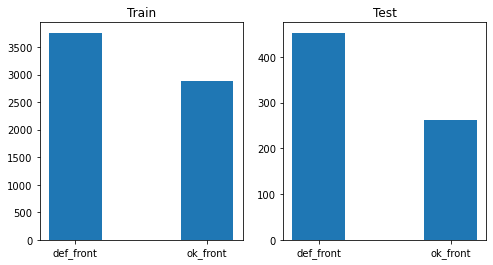

 Defective Training Images 	: 3758
 Ok Training Images 		: 2875
 Defective Testing Images 	: 453
 Ok Testing Images 		: 262


In [11]:
fig, axes = plt.subplots(1, 2, figsize=(8,4))
axes[0].bar(classes,x_train,width = 0.4)
axes[1].bar(classes,x_test,width = 0.4)
axes[0].set_title('Train')
axes[1].set_title('Test')
plt.show()

print(' Defective Training Images \t: ' + str(len(os.listdir(train_def))))
print(' Ok Training Images \t\t: ' + str(len(os.listdir(train_ok))))
print(' Defective Testing Images \t: ' + str(len(os.listdir(test_def))))
print(' Ok Testing Images \t\t: ' + str(len(os.listdir(test_ok))))

# Predictive Analytics

## Model Formulation

In [12]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [13]:
for layer in inception.layers:
  layer.trainable = False

In [14]:
x = Flatten()(inception.output)

In [15]:
prediction = Dense(1, activation='sigmoid')(x)

In [16]:
model = Model(inputs=inception.input, outputs=prediction)

In [17]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

## Model Compilation

In [18]:
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [19]:
history = model.fit(training_data,
        validation_data=validation_data,
        epochs=10
) 


Epoch 1/10
208/208 [==============================] - 470s 2s/step - loss: 0.3079 - accuracy: 0.9480 - val_loss: 0.0389 - val_accuracy: 0.9930
Epoch 2/10
208/208 [==============================] - 450s 2s/step - loss: 0.0913 - accuracy: 0.9783 - val_loss: 0.0227 - val_accuracy: 0.9930
Epoch 3/10
208/208 [==============================] - 448s 2s/step - loss: 0.0647 - accuracy: 0.9876 - val_loss: 0.0278 - val_accuracy: 0.9916
Epoch 4/10
208/208 [==============================] - 427s 2s/step - loss: 0.0740 - accuracy: 0.9858 - val_loss: 0.0852 - val_accuracy: 0.9874
Epoch 5/10
208/208 [==============================] - 416s 2s/step - loss: 0.1344 - accuracy: 0.9830 - val_loss: 0.0900 - val_accuracy: 0.9846
Epoch 6/10
208/208 [==============================] - 414s 2s/step - loss: 0.1215 - accuracy: 0.9842 - val_loss: 0.2183 - val_accuracy: 0.9720
Epoch 7/10
208/208 [==============================] - 416s 2s/step - loss: 0.1050 - accuracy: 0.9900 - val_loss: 0.0775 - val_accuracy: 0.9818

## Evaluation and Prediction

In [20]:
evaluation = model.evaluate(test_data)

41/41 [==============================] - 60s 1s/step - loss: 1.2795 - accuracy: 0.9023


Text(0, 0.5, 'Metrics')

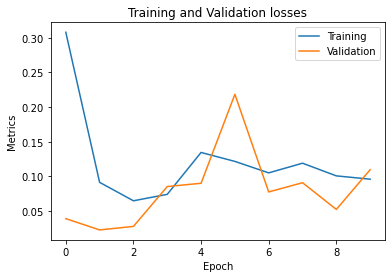

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation losses')
plt.xlabel('Epoch')
plt.ylabel('Metrics')

Text(0, 0.5, 'Metrics')

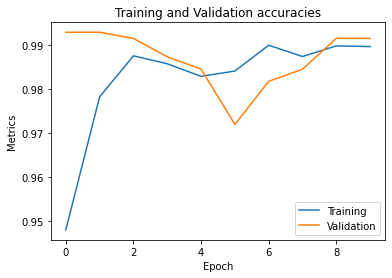

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation accuracies')
plt.xlabel('Epoch')
plt.ylabel('Metrics')

In [23]:
from keras.models import load_model

model.save('CD_Inception_V3.h5')

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
y_pred_prob = model.predict(test_data)

In [26]:
THRESHOLD = 0.5
y_pred_class = (y_pred_prob >= THRESHOLD).reshape(-1,)
y_true_class = test_data.classes[test_data.index_array]

pd.DataFrame(
    confusion_matrix(y_true_class, y_pred_class),
    index = [["Actual", "Actual"], [ "defect","ok"]],
    columns = [["Predicted", "Predicted"], ["defect","ok"]],
)

<IPython.core.display.Javascript object>

Predicted     
                 defect   ok
Actual defect       699   82
       ok            45  474

In [27]:
print(classification_report(y_true_class, y_pred_class, digits = 4))

              precision    recall  f1-score   support

           0     0.9395    0.8950    0.9167       781
           1     0.8525    0.9133    0.8819       519

    accuracy                         0.9023      1300
   macro avg     0.8960    0.9042    0.8993      1300
weighted avg     0.9048    0.9023    0.9028      1300



## Fine-tuning 

In [28]:
from tensorflow import keras

In [29]:
model.trainable = True

In [30]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [31]:
model.compile(
    optimizer=keras.optimizers.Adam(1e-5),  # Low learning rate
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[keras.metrics.BinaryAccuracy()],
)

In [32]:
epochs = 10
model.fit(training_data, epochs=epochs, validation_data=validation_data)

Epoch 1/10


C:\Users\91865\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


208/208 [==============================] - 1518s 7s/step - loss: 0.6989 - binary_accuracy: 0.9380 - val_loss: 1.2170 - val_binary_accuracy: 0.8937
Epoch 2/10
208/208 [==============================] - 1511s 7s/step - loss: 0.2160 - binary_accuracy: 0.9768 - val_loss: 0.4541 - val_binary_accuracy: 0.9441
Epoch 3/10
208/208 [==============================] - 1531s 7s/step - loss: 0.1488 - binary_accuracy: 0.9866 - val_loss: 0.0515 - val_binary_accuracy: 0.9972
Epoch 4/10
208/208 [==============================] - 1486s 7s/step - loss: 0.1160 - binary_accuracy: 0.9891 - val_loss: 0.1146 - val_binary_accuracy: 0.9888
Epoch 5/10
208/208 [==============================] - 1463s 7s/step - loss: 0.1073 - binary_accuracy: 0.9902 - val_loss: 0.0184 - val_binary_accuracy: 0.9958
Epoch 6/10
208/208 [==============================] - 1468s 7s/step - loss: 0.1008 - binary_accuracy: 0.9910 - val_loss: 0.0755 - val_binary_accuracy: 0.9902
Epoch 7/10
208/208 [==============================] - 1472s 7s/

Text(0, 0.5, 'Metrics')

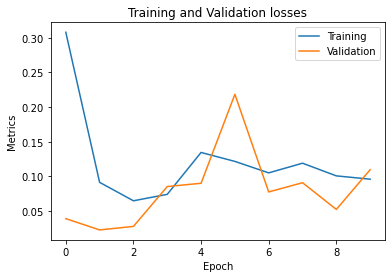

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation losses')
plt.xlabel('Epoch')
plt.ylabel('Metrics')

Text(0, 0.5, 'Metrics')

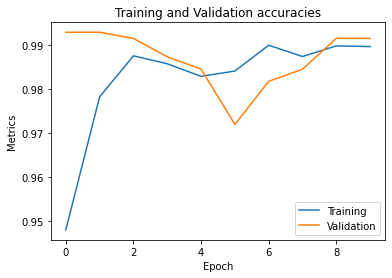

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation accuracies')
plt.xlabel('Epoch')
plt.ylabel('Metrics')

In [35]:
evaluation1 = model.evaluate(test_data)

41/41 [==============================] - 67s 2s/step - loss: 1.0310 - binary_accuracy: 0.8854


In [36]:
y_pred_prob1 = model.predict(test_data)

In [37]:
THRESHOLD = 0.5
y_pred_class = (y_pred_prob1 >= THRESHOLD).reshape(-1,)
y_true_class = test_data.classes[test_data.index_array]

pd.DataFrame(
    confusion_matrix(y_true_class, y_pred_class),
    index = [["Actual", "Actual"], [ "defect","ok"]],
    columns = [["Predicted", "Predicted"], ["defect","ok"]],
)

<IPython.core.display.Javascript object>

Predicted     
                 defect   ok
Actual defect       702   79
       ok            70  449

In [38]:
print(classification_report(y_true_class, y_pred_class, digits = 4))

              precision    recall  f1-score   support

           0     0.9093    0.8988    0.9041       781
           1     0.8504    0.8651    0.8577       519

    accuracy                         0.8854      1300
   macro avg     0.8799    0.8820    0.8809      1300
weighted avg     0.8858    0.8854    0.8855      1300



After fine-tuning, the model, the accuracy of model is less as compared to the model without fine-tuning. So it is recommended to use the model without fine-tuning.